<a href="https://colab.research.google.com/github/ilhamsyah183/Machine-Learning-Documentation/blob/main/Pneumonia%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile,os

In [ ]:
local_zip = '/content/drive/MyDrive/Datasets Submisions/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/dataset2')
zip_ref.close()

In [ ]:
data = "/content/drive/MyDrive/Datasets Submisions/chest_xray/test/NORMAL"
data2 = "/content/drive/MyDrive/Datasets Submisions/chest_xray/test/PNEUMONIA"
kategori = ["NORMAL","PNEUMONIA"]
img_size = 224

In [ ]:
Alldata = []

with os.scandir(data) as files:
  for file in files:
        if file.name.endswith('.jpeg'):
          # adds only the image files to the flowers list
            path = "/content/drive/MyDrive/Datasets Submisions/chest_xray/test/NORMAL/"
            name = path + file.name
            Alldata.append(name)

with os.scandir(data2) as files:
  for file in files:
        if file.name.endswith('.jpeg'):
          # adds only the image files to the flowers list
            path = "/content/drive/MyDrive/Datasets Submisions/chest_xray/test/PNEUMONIA/"
            name = path + file.name
            Alldata.append(name)

In [ ]:
Alldata[0]

'/content/drive/MyDrive/Datasets Submisions/chest_xray/test/NORMAL/IM-0021-0001.jpeg'

In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553467904/553467096 [==============================] - 6s 0us/step


In [ ]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(img_size,img_size))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
data = {}
# lop through each image in the dataset
for dataImg in Alldata:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(dataImg,model)
        data[dataImg] = feat
    # if something fails, (optional)
    except Exception as e:
        print("error",e)
        pass

In [ ]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

In [ ]:
feat.shape

(624, 1, 4096)

In [ ]:
# reshape so that there are 624 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(624, 4096)

In [ ]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
kmeans = KMeans(n_clusters=2,n_jobs=-1, random_state=22)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=22, tol=0.0001, verbose=0)

In [ ]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
df1 = pd.DataFrame(groups[0])
df1

,0
0,/content/dataset2/chest_xray/test/NORMAL/NORMA...
1,/content/dataset2/chest_xray/test/NORMAL/NORMA...
2,/content/dataset2/chest_xray/test/NORMAL/NORMA...
3,/content/dataset2/chest_xray/test/NORMAL/NORMA...
4,/content/dataset2/chest_xray/test/NORMAL/NORMA...
...,...
331,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
332,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
333,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
334,/content/dataset2/chest_xray/test/PNEUMONIA/pe...


In [ ]:
df2 = pd.DataFrame(groups[1])
df2

,0
0,/content/dataset2/chest_xray/test/NORMAL/IM-00...
1,/content/dataset2/chest_xray/test/NORMAL/IM-00...
2,/content/dataset2/chest_xray/test/NORMAL/IM-00...
3,/content/dataset2/chest_xray/test/NORMAL/IM-00...
4,/content/dataset2/chest_xray/test/NORMAL/IM-00...
...,...
283,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
284,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
285,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
286,/content/dataset2/chest_xray/test/PNEUMONIA/pe...


In [ ]:
df1 = pd.DataFrame(groups[0])
df1 = df1.append(groups[1])
df1 = df1.reset_index(drop=True)
df1

,0
0,/content/dataset2/chest_xray/test/NORMAL/NORMA...
1,/content/dataset2/chest_xray/test/NORMAL/NORMA...
2,/content/dataset2/chest_xray/test/NORMAL/NORMA...
3,/content/dataset2/chest_xray/test/NORMAL/NORMA...
4,/content/dataset2/chest_xray/test/NORMAL/NORMA...
...,...
619,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
620,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
621,/content/dataset2/chest_xray/test/PNEUMONIA/pe...
622,/content/dataset2/chest_xray/test/PNEUMONIA/pe...


In [ ]:
predicted = []
for x in range(0,336):
  predicted.append(0)

for x in range(0,288):
  predicted.append(1)



In [ ]:
df1['Predicted'] = predicted
df1

,0,Predicted
0,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0
1,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0
2,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0
3,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0
4,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0
...,...,...
619,/content/dataset2/chest_xray/test/PNEUMONIA/pe...,1
620,/content/dataset2/chest_xray/test/PNEUMONIA/pe...,1
621,/content/dataset2/chest_xray/test/PNEUMONIA/pe...,1
622,/content/dataset2/chest_xray/test/PNEUMONIA/pe...,1


In [ ]:
df1['Original'] = np.where(df1[0].str[:40]!= '/content/dataset2/chest_xray/test/NORMAL', 1, 0)
df1[180:200]

,0,Predicted,Original
180,/content/dataset2/chest_xray/test/NORMAL/IM-00...,0,0
181,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0,0
182,/content/dataset2/chest_xray/test/NORMAL/IM-00...,0,0
183,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0,0
184,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0,0
185,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0,0
186,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0,0
187,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0,0
188,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0,0
189,/content/dataset2/chest_xray/test/NORMAL/NORMA...,0,0


In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1)
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 336 to 30


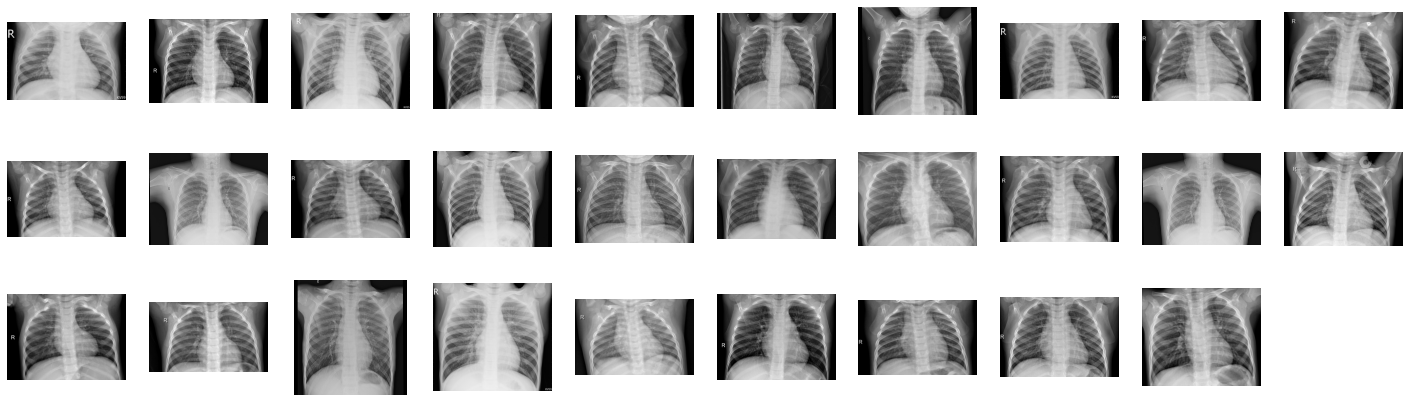

In [ ]:
view_cluster(0)

In [ ]:
import pandas as pd
df1.to_excel("KmeansCluster.xlsx")